<h2> Сборный проект. Исследование успешности компьютерных игр. <a class="tocSkip"> </h2>

<b>Описание проекта:</b> \
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. \
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

<b>Цель исследования</b> - выявить определяющие успешность игры закономерности. 
    
<b>План работы над проектом:</b> \
1.Просмотреть таблицу и выявить аномалии и пропущенные значения.\
2.Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.\
3.Провести анализ по данным и подготовить актуальные данные.\
4.Составить портреты пользователей для купных регионов продаж.\
5.Выполнить проверку гипотез.\
6.Оформить проект и сделать выводы по каждому шагу.




<b>Исходные данные</b> - открытые источники (данные о продажах игр, оценки пользователей и экспертов, жанры и платформы).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [29]:
data_games = pd.read_csv(r'C:\Users\user\Desktop\Обучение\Яндекс\Проекты GitHub\5  Сборный проект 1 -  Исследование успешности компьютерных игр/games.csv')
data_games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<b>Описание данных:</b>

• Name — название игры\
• Platform — платформа\
• Year_of_Release — год выпуска\
• Genre — жанр игры\
• NA_sales — продажи в Северной Америке (миллионы проданных копий)\
• EU_sales — продажи в Европе (миллионы проданных копий)\
• JP_sales — продажи в Японии (миллионы проданных копий)\
• Other_sales — продажи в других странах (миллионы проданных копий)\
• Critic_Score — оценка критиков (максимум 100)\
• User_Score — оценка пользователей (максимум 10)\
• Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг\ компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

<b>Вывод основной информации на экран:

In [3]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


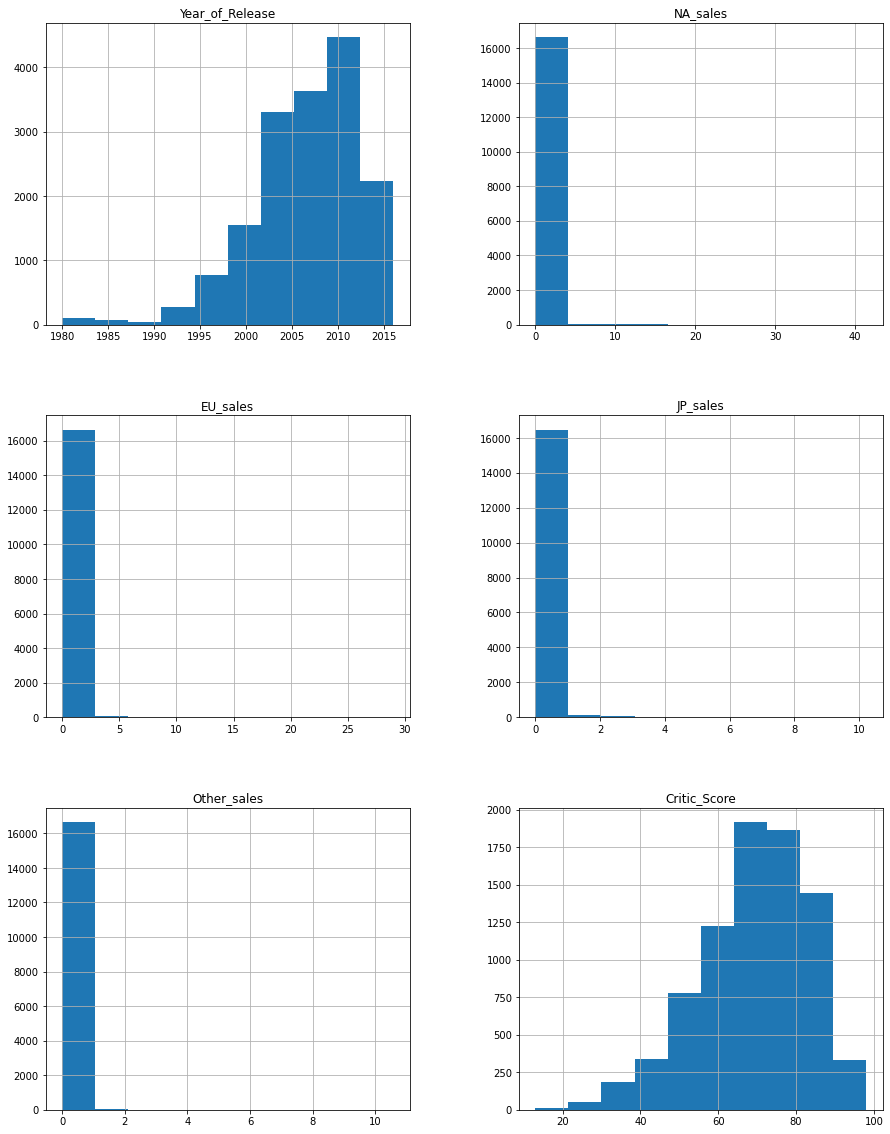

In [5]:
data_games.hist(figsize=(15, 20));

<b>Вывод:</b>\
Всего в датасете 16715 строк и 11 столбцов. \
Имеются пропущенные значения, некооректные типы данных и неправильные названия столбцов.

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

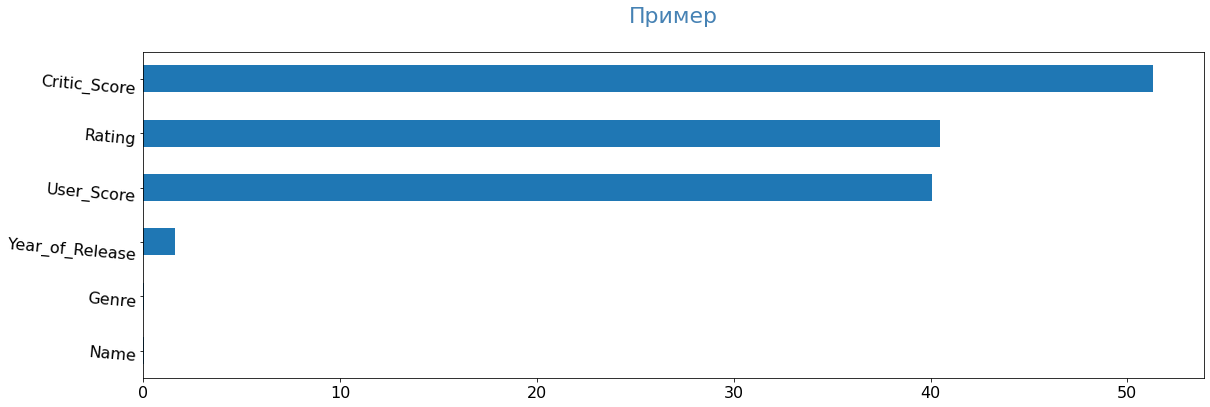

In [7]:
pass_value_barh(data_games)

### Предобработка данных

#### Замена наименований столбцов

In [8]:
data_games.columns = data_games.columns.str.lower()

cat_col = ['name', 'platform', 'genre', 'rating']
for i in cat_col:
    data_games[i] = data_games[i].str.lower()

In [9]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Замена типа данных

In [10]:
# заменим на тип int
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64') 
data_games['year_of_release'].dtype

Int64Dtype()

In [11]:
# data_games['user_score'] = data_games['user_score'].astype('float64') - не преобразуется из-за 'tbd' 
print('Значений tbd:', data_games.query('user_score == "tbd"')['user_score'].count())


Значений tbd: 2424


В столбце с оценкой пользователей ('user_score') встречается аббревиатура 'tbd', которая расшифровывается как 'To Be Determined' ('Будет определено'). Будем считать такие значения пропусками и заменим их на NaN.



In [12]:
# Замена на NaN 
data_games.loc[data_games['user_score']=='tbd', 'user_score'] = np.nan
        
data_games['user_score'] = data_games['user_score'].astype('float64')
data_games['user_score'].dtype

dtype('float64')

#### Обработка пропусков  

In [13]:
data_games.isnull().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [14]:
data_games.query('name.isna() and genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data_games.query('year_of_release.isna()').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,<NA>,misc,1.93,0.33,0.00,0.21,92.0,8.2,t
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.00,0.07,73.0,NaN,e
678,lego indiana jones: the original adventures,wii,<NA>,action,1.51,0.61,0.00,0.21,78.0,6.6,e10+
719,call of duty 3,wii,<NA>,shooter,1.17,0.84,0.00,0.23,69.0,6.7,t
805,rock band,wii,<NA>,misc,1.33,0.56,0.00,0.20,80.0,6.3,t


В столбцах соответствующих году выпуска, названию и жанру игр пропусков немного их можно просто удалить. 

In [16]:
data_games.dropna(subset = ['year_of_release'], inplace= True)
data_games.dropna(subset = ['name' ], inplace= True)
data_games.dropna(subset = ['genre'], inplace= True)

Рассмотрим столбец рейтинга игр -  определен в сооответствии с Entertainment Software Rating Board (ESRB). Пропущенный значения заменим на 'RP'(рейтинг ожидается).

In [17]:
data_games['rating'].sort_values().unique()

array(['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'rp', 't', nan], dtype=object)

In [18]:
data_games['rating'].value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

In [19]:
data_games['rating'] = data_games['rating'].fillna('RP')


Пропуски в столбцах 'user_score' и 'critic_score' оставляем, т.к. замена средним или медианным значением может исказить результат исследования.

#### Удаление дубликатов

In [20]:
print('Количество явных дубликатов:', data_games.duplicated().sum())

Количество явных дубликатов: 0


#### Подсчет суммарных продаж по всем регионам


In [21]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']


In [22]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


<b> Вывод

Было выполнено следующее: \
1.Название столбцов было приведено к нижнему регистру. \
2.Данные приведены к нужным типам. \
3.Восстановлены пропуски в строках. \
4.Удалены строки без нужных данных. \
5.Добавлен столбец суммарных продаж. 

Вероятные причины появления пропусков: \
1.технические ошибки \
2.отсутствие данных \
3.человеческий фактор 

Большое количество пропусков в столбцах для оценки критиков и пользователей, а так же рейтинга ESRB можно объяснить временным фактором. Сама организация ESRB существует c 1994г, а площадок для оценки игр критиками и пользователями на заре развития электронных не было. 



In [23]:
# check
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

#### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [24]:
games_amount = data_games.groupby('year_of_release')['name'].count().reset_index()
games_amount.columns = ['year', 'amount']
games_amount

,year,amount
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


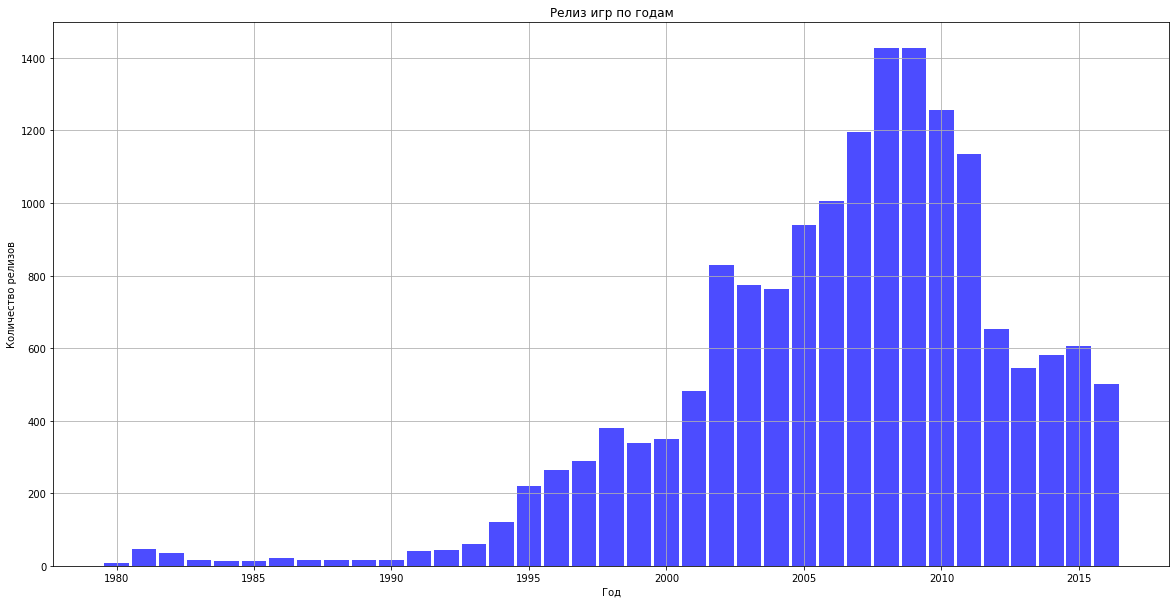

In [25]:
plt.figure(figsize=(20,10))
plt.bar(games_amount['year'], games_amount['amount'], color='b', alpha=0.7, width=0.9)
plt.title('Релиз игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество релизов')
plt.grid()
plt.show()

<b> Вывод

Данные за все периоды не нужны, период с 1980 по 1994гг можно не рассматривать.  
До 1995г игр выпускалось очень мало. С 1995г по 2009г идет рост выпуска игр(есть два небольших перида спада в эти годы) - развиваются технологии, устройства для игр становятся доступными, растет число людей увлекающихся играми. Затем  два года 2010-2011 ощутимого спада(примерно в 2 раза). После чего количество выпускаемых игр стабилизируется.

#### Как менялись продажи по платформам?

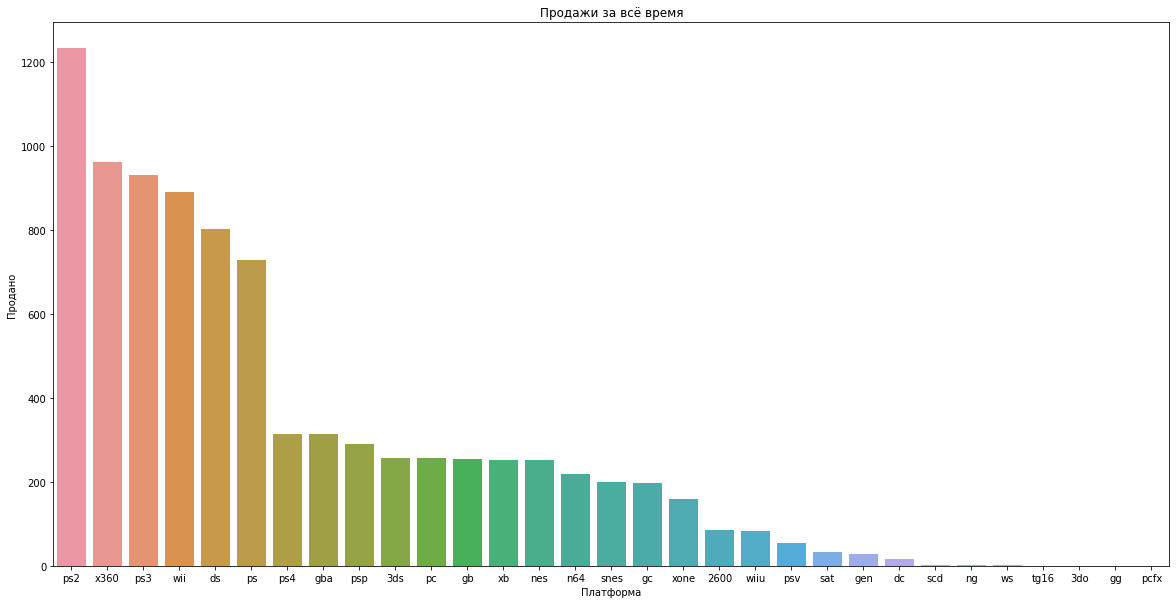

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [26]:
# Создадим сводную таблицу
sales_by_platforms = data_games.pivot_table(index='platform',
                                            values='total_sales',
                                            aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=sales_by_platforms.index,y=sales_by_platforms['total_sales'])
plt.title('Продажи за всё время')
plt.xlabel('Платформа')
plt.ylabel('Продано')
plt.show()

sales_by_platforms

Есть шесть лидеров - PlayStation2, Xbox360, PlayStation3, Wii, Nintendo DS и PlayStation.\
Рассмотрим, как менялись продажи для этих платформ с течением времени

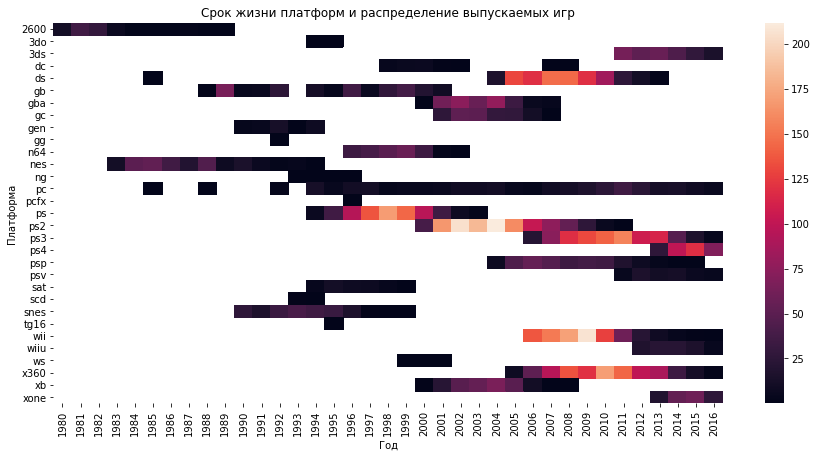

In [27]:
# построим тепловую карту, по ней хорошо виден 'срок жизни платформ' и распределение выпускаемых игр
sales_by_platforms = data_games.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc=('sum'))
plt.figure(figsize = (15,7))
sns.heatmap(sales_by_platforms)
plt.title('Срок жизни платформ и распределение выпускаемых игр')
plt.xlabel('Год')
plt.ylabel('Платформа')            
plt.show()

<b> Вывод

1. ТОП-6 (далее большой разрыв) платформ по продажам это - PlayStation2, Xbox360, PlayStation3, Wii, Nintendo DS и PlayStation.
2. Средний срок жизни платформ порядка 10-12 лет, с пиком выпуска игр примерно посередине.
3. Лидером рынка является компания Sony со своими платформами: PS, PS2, PS3, PS4 каждая из которых выходит, когда у предыдущей платформы происходит снижение выпускаемых игр.
4. Отмечу платформы Xbox360 и платформы компании Nintendo(Wii и DS), которые оказывают конкуренцию платформам Sony.
4. Стоит отметить РС, как игровую платформу его 'жизнь' дольше всех.

####   Актуальный период. Лидеры среди платформ. Потенциально прибыльные платформы.

За актуальный возьмем период с 2014г, т.к. после большого спада в 2010-11гг произошла стабилизация количества выпускаемых игр.
Построим гистограмму и тепловую карту по платформам за актуальный переиод.

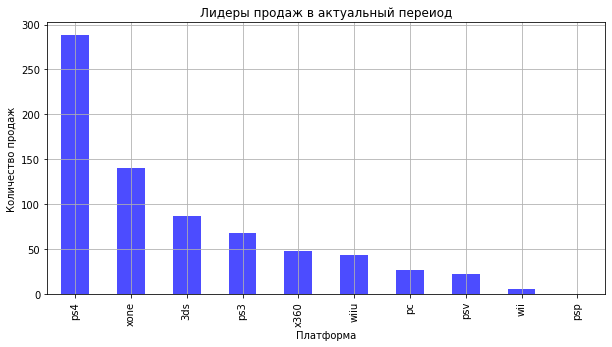

In [28]:
actual_data_games = data_games.query('year_of_release>=2014')
actual_data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,5),
                                                                                             kind='bar',
                                                                                             alpha=0.7,
                                                                                             color='b')
plt.title('Лидеры продаж в актуальный переиод')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.grid()
plt.show()

<b> Вывод

За актуальный период с 2014 по 2016гг,  можно сделать следующий прогноз на 2017г:
1. Прибыльными могут оказаться платформы PS4 и XOne, это 'молодые'  - перспективные платформы, они находятся где-то на пике выпуска игр.
2. 3DS, PSV, WIIU идут на спад, платформы устаревают, но на них еще можно заработать. 
3. Wii, X360, PS3 постепенно 'умирают' выпуск игр прекращается.
3. По платформам DS и PSP выпуск игр прекращен.
4. Платформа РС как всегда стабильна, но объемы небольшие.

#### Глобальные продажи игр по платформам. Ящик с усами.

Рассматривать будем только актуальный период т.е. с 2014г, исключим 'умершие' платформы PSP и DS. Построим график boxplot(ящик с усами).

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


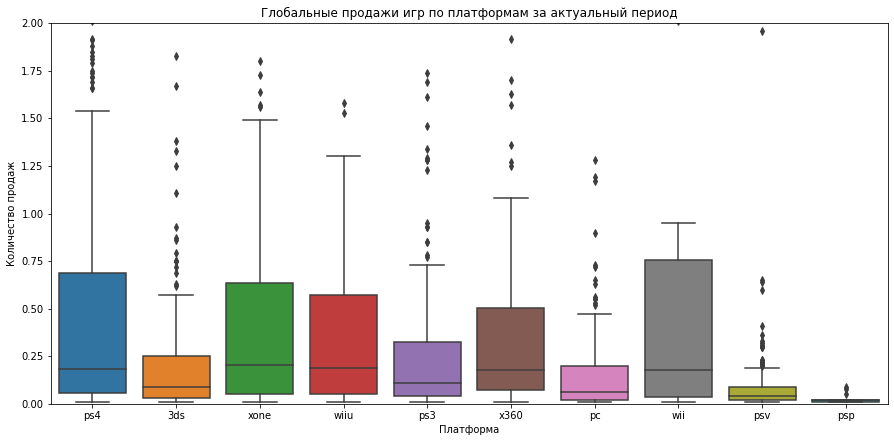

In [29]:
display(actual_data_games.head())

plt.figure(figsize=(15,7))
plt.ylim(0,2,5)
sns.boxplot(x='platform',y='total_sales',data=actual_data_games);
plt.title('Глобальные продажи игр по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

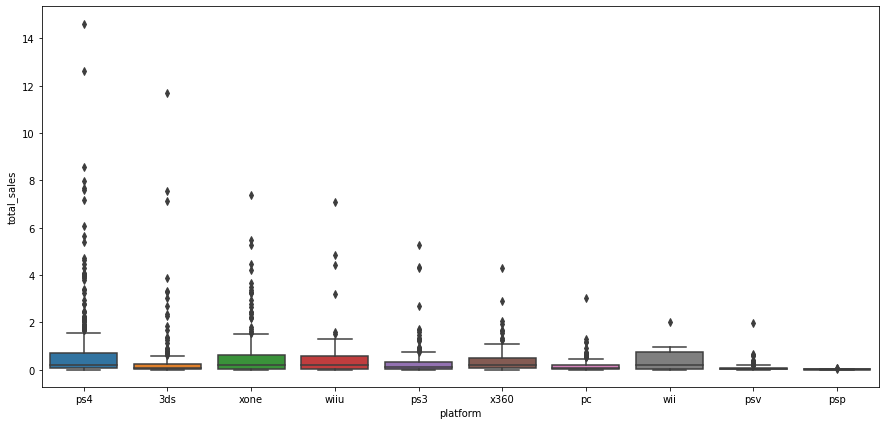

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x='platform',y='total_sales',data=actual_data_games);

In [31]:
actual_data_games.query('platform =="ps4" and total_sales > 14')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63


Самая продоваемая игра Call of duty: black ops 3 на платформе PS4 более 14млн 

<b> Вывод

1. По графику видно, что распределение продаж у всех платформ скошено вправо, т.е. прядка 25% неуспешных игр, еще четверть игр близка к неуспешным, зато оставшиееся имеют большую степень успеха у пользователей.
2. PS4, 3DS, Xone в целом игры выпущенные на этих платформах наиболее успешны.
3. PS3, WIIU, X360 - игры на этих платформах тоже достаточно успешны.
4. Самая продоваемая игра Call of duty: black ops 3 на платформе PS4 более 14млн 

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.Диаграмма рассеяния, корреляця между отзывами и продажами. Сравнение корреляции продаж и отзывов с другими платформами.

Рассмотрим платформу XB360, т.к. это одна из самых популярных платформ и игры выпущенные на этой платформе наиболее успешны.

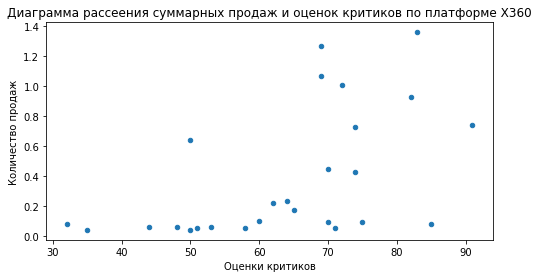

Корреляция между количеством продаж и оценкой критиков составляет: 0.5257228356581523


In [32]:
x360_critic = actual_data_games.query('platform=="x360"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(8,4))
plt.title('Диаграмма рассеения суммарных продаж и оценок критиков по платформе X360')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()
# Расчет корреляции
x360_cor = actual_data_games.query('platform=="x360"')
print('Корреляция между количеством продаж и оценкой критиков составляет:', x360_cor['total_sales'].corr(x360_cor['critic_score']))

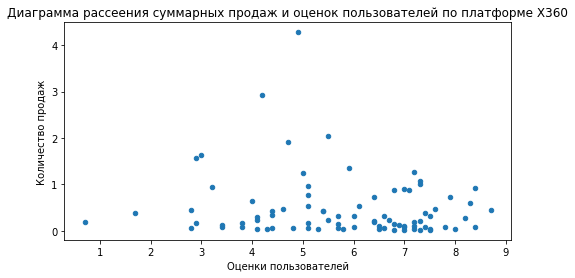

Корреляция между количеством продаж и оценкой пользователей составляет: -0.138444570945665


In [33]:
x360_users = actual_data_games.query('platform=="x360"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(8,4))
plt.title('Диаграмма рассеения суммарных продаж и оценок пользователей по платформе X360')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()
# Расчет корреляции
print('Корреляция между количеством продаж и оценкой пользователей составляет:', x360_cor['total_sales'].corr(x360_cor['user_score']))

<b> Вывод

1.Наблюдаем зависимость продаж игр от оценок критиков на платформе Xbox360 - коэффициент корреляции 0,52. \
2.Зависимости между продажами и пользовательскими оценками практически нет.

Рассмотрим еще 2 платфомы (PS4, Xone), что бы подтвердить этот вывод:

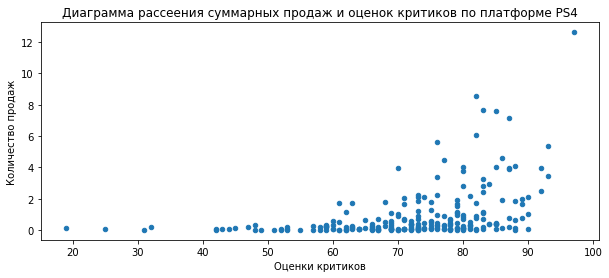

Корреляция между количеством продаж и оценкой критиков по платформ PS4 составляет: 0.40266141068104083


In [34]:
ps4_critic = actual_data_games.query('platform=="ps4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score', y='total_sales',figsize=(10,4))
plt.title('Диаграмма рассеения суммарных продаж и оценок критиков по платформе PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()
# Расчет корреляции
ps4_cor = actual_data_games.query('platform=="ps4"')
print('Корреляция между количеством продаж и оценкой критиков по платформ PS4 составляет:', ps4_cor['total_sales'].corr(ps4_cor['critic_score']))

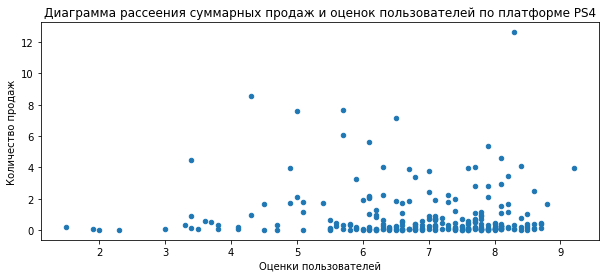

Корреляция между количеством продаж и оценкой пользователей по платформе PS4 составляет: -0.040131589472697356


In [35]:
ps4_users = actual_data_games.query('platform=="ps4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4))
plt.title('Диаграмма рассеения суммарных продаж и оценок пользователей по платформе PS4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()
# Расчет корреляции
print('Корреляция между количеством продаж и оценкой пользователей по платформе PS4 составляет:', ps4_cor['total_sales'].corr(ps4_cor['user_score']))

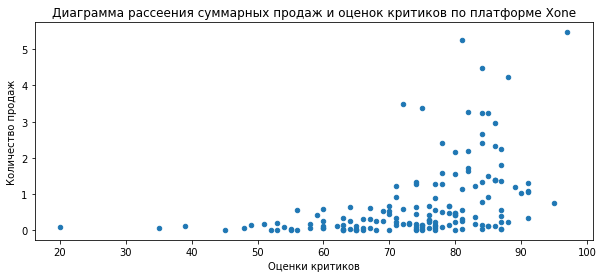

Корреляция между количеством продаж и оценкой критиков по платформ Xone составляет: 0.42867694370333226


In [36]:
xone_critic = actual_data_games.query('platform=="xone"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score', y='total_sales',figsize=(10,4))
plt.title('Диаграмма рассеения суммарных продаж и оценок критиков по платформе Xone')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()
# Расчет корреляции
xone_cor = actual_data_games.query('platform=="xone"')
print('Корреляция между количеством продаж и оценкой критиков по платформ Xone составляет:', xone_cor['total_sales'].corr(xone_cor['critic_score']))

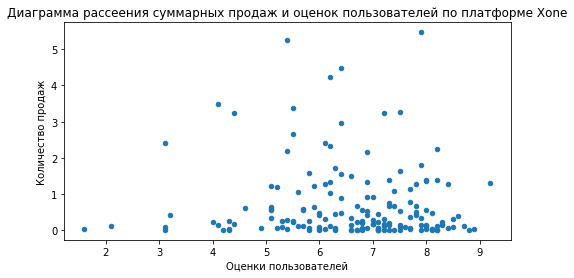

Корреляция между количеством продаж и оценкой пользователей составляет: -0.0703839280647581


In [37]:
xone_users = actual_data_games.query('platform=="xone"').sort_values(by='user_score',ascending=True)\
.plot(kind='scatter',x='user_score',y='total_sales',figsize=(8,4))
plt.title('Диаграмма рассеения суммарных продаж и оценок пользователей по платформе Xone')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()
# Расчет корреляции
print('Корреляция между количеством продаж и оценкой пользователей составляет:', xone_cor['total_sales']\
      .corr(xone_cor['user_score']))

По данным исследования платформ PS4 и Xone вывод по платформе Х360 подтверждается.
 

<b> Вывод

1.Наблюдаем зависимость продаж игр от оценок критиков. \
2.Зависимости между продажами и пользовательскими оценками нет.

#### Жанры игр и глобальные продажи

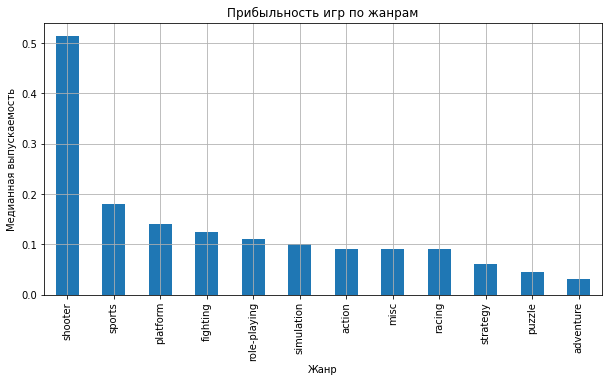

In [38]:
profit_genre = actual_data_games.groupby('genre')['total_sales'].median().sort_values(ascending=False)
profit_genre.plot(y='genre',grid=True,figsize=(10,5),kind='bar')
plt.title('Прибыльность игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианная выпускаемость')
plt.show()

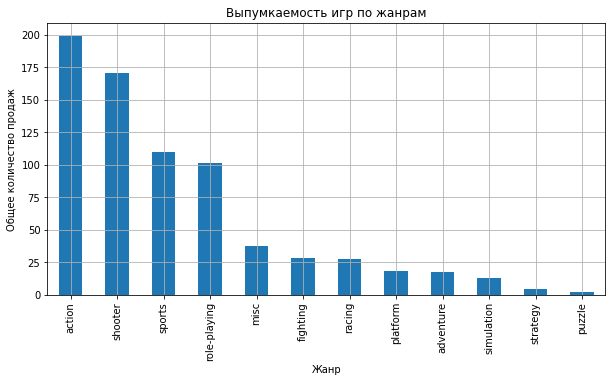

In [39]:
total_genre = actual_data_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
total_genre.plot(y='genre',grid=True,figsize=(10,5),kind='bar')
plt.title('Выпумкаемость игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общее количество продаж')
plt.show()

Построим диаграмму размаха по жанрам:

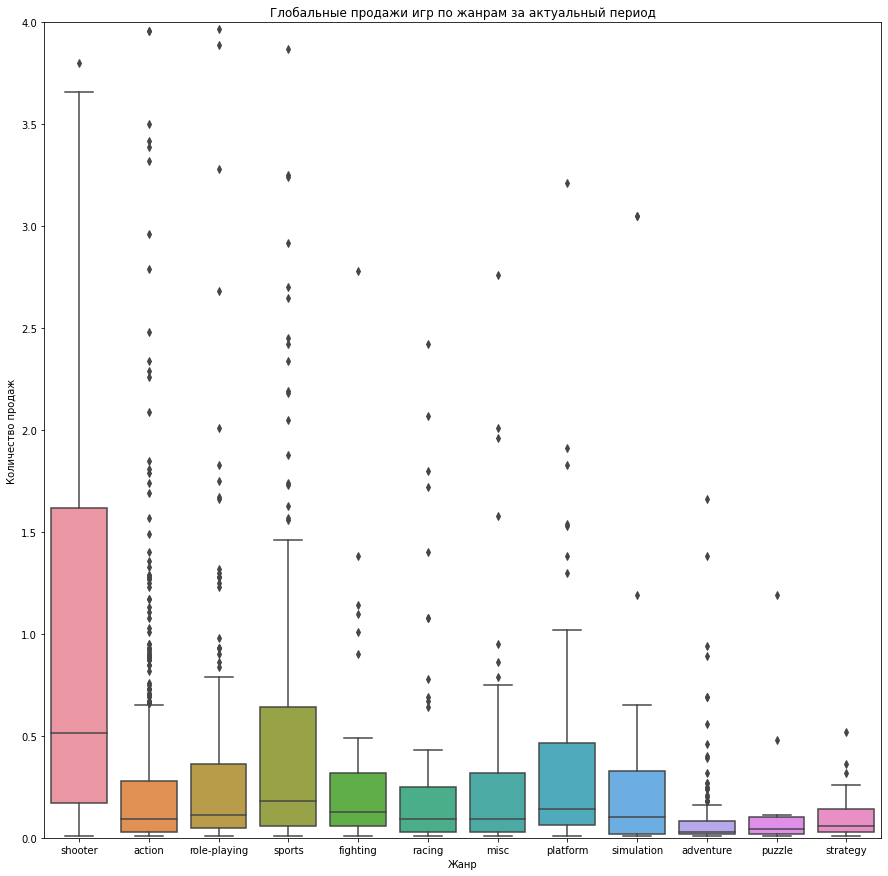

In [40]:
plt.figure(figsize=(15,15))
plt.ylim(0,4)
sns.boxplot(x='genre',y='total_sales',data=actual_data_games);
plt.title('Глобальные продажи игр по жанрам за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

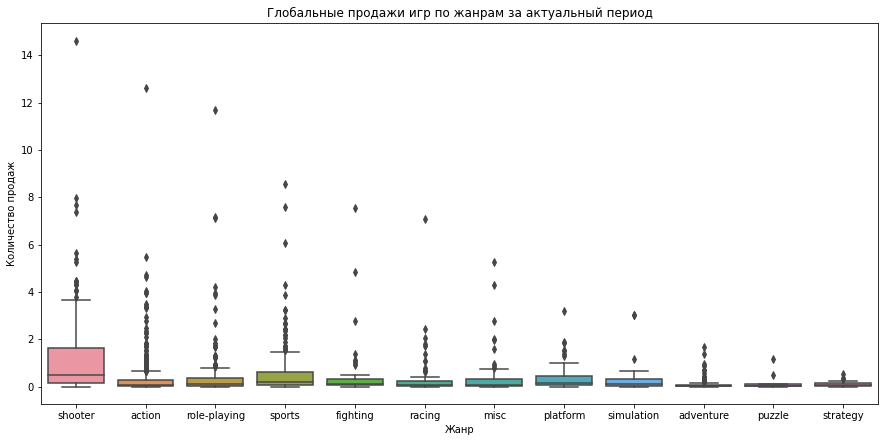

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(x='genre',y='total_sales',data=actual_data_games);
plt.title('Глобальные продажи игр по жанрам за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

<b> Вывод

Самые популярные игры - это игры жанра action, shooter, sports, role-plaing.


### Портрет пользователя каждого региона - NA, EU, JP

#### Самые популярные платформы (топ-5).

In [42]:
# топ-5 самых популярных платформ по регионам - NA, EU, JP
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    local_data = actual_data_games.pivot_table(index='platform', aggfunc={i:'sum'}).sort_values(by=i, ascending=False).head().reset_index()
    local_data['share'] = round(local_data[i] / local_data[i].sum(), 3) * 100
    display(local_data)

,platform,na_sales,share
0,ps4,98.61,39.0
1,xone,81.27,32.1
2,x360,28.30,11.2
3,3ds,22.64,9.0
4,ps3,22.05,8.7


,platform,eu_sales,share
0,ps4,130.04,55.1
1,xone,46.25,19.6
2,ps3,25.54,10.8
3,pc,17.97,7.6
4,3ds,16.12,6.8


,platform,jp_sales,share
0,3ds,44.24,47.9
1,ps4,15.02,16.3
2,psv,14.54,15.7
3,ps3,11.22,12.2
4,wiiu,7.31,7.9


In [43]:
# Формируем датасет ТОП 5 платформ плюс Other для каждого региона 
na_platforms = actual_data_games.pivot_table(index='platform', aggfunc={'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
other_na = na_platforms[5:]
na_platforms = na_platforms.head()
na_platforms = na_platforms.append({'platform': 'Other', 'na_sales': other_na['na_sales'].sum()}, ignore_index = True)
display(na_platforms)


eu_platforms = actual_data_games.pivot_table(index='platform', aggfunc={'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
other_eu = eu_platforms[5:]
eu_platforms = eu_platforms.head()
eu_platforms = eu_platforms.append({'platform': 'Other', 'eu_sales': other_eu['eu_sales'].sum()}, ignore_index = True)
display(eu_platforms)

jp_platforms = actual_data_games.pivot_table(index='platform', aggfunc={'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()
other_jp = jp_platforms[5:]
jp_platforms = jp_platforms.head()
jp_platforms = jp_platforms.append({'platform': 'Other', 'jp_sales': other_jp['jp_sales'].sum()}, ignore_index = True)
display(na_platforms)

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
5,Other,31.19


,platform,eu_sales
0,ps4,130.04
1,xone,46.25
2,ps3,25.54
3,pc,17.97
4,3ds,16.12
5,Other,34.76


,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
5,Other,31.19


Строим графики

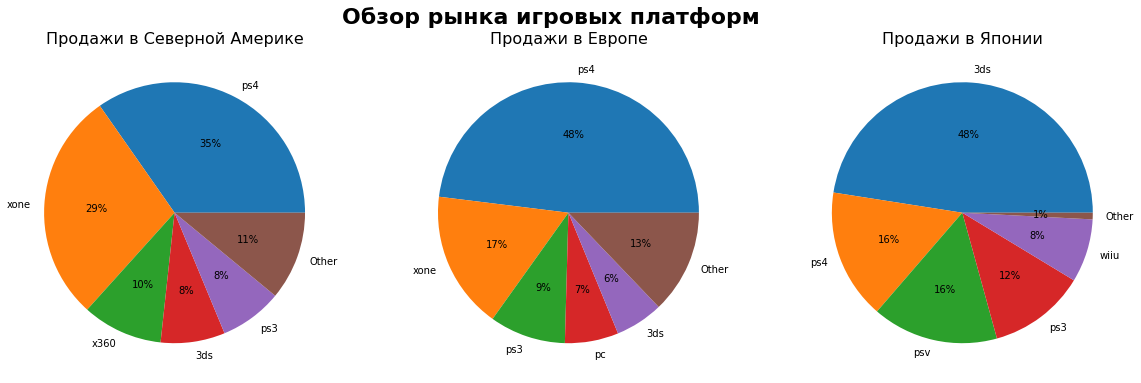

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

fig.suptitle('Обзор рынка игровых платформ', fontsize=22, fontweight='bold')
ax1.pie(na_platforms['na_sales'], labels=na_platforms['platform'], autopct='%.0f%%')
ax1.set_title('Продажи в Северной Америке',fontsize=16)
ax2.pie(eu_platforms['eu_sales'], labels=eu_platforms['platform'], autopct='%.0f%%')
ax2.set_title('Продажи в Европе', fontsize=16)
ax3.pie(jp_platforms['jp_sales'], labels=jp_platforms['platform'], autopct='%.0f%%')
ax3.set_title('Продажи в Японии', fontsize=16);

<b> Вывод

1. В топ-5 рынка Америки и Европы попали одни и теже платформы. В Америке на первом месте родная платформа - Xbox360, далее два поколения Sony с долей рынка порядка 42%. Но вместе с платформой XOne, доля рынка "отечественой" компании Xbox в Северной Америке 47%. Замыкает пятерку платформа 3DS компании Nintendo 10%.
2. В Европе впереди японский производитель Sony со своими платформама PS4 и PS3 суммарно почти 60%(Америка 42%)! Далее на 2 и 3 местах Xbox суммарная доля 30% (в Америке 47% более чем в 1,5раза). Nintendo 3DS, как и в Америке 10%.
3. В Японии все по своему! Только свои платформы, Хbox и близко нет. Nintendo 3DS занимает более половины рынка. 2-4 места Sony Playstaition 42%. Замыкает топ WiiU 7.5%.

#### Самые популярные жанры (топ-5). 

In [45]:
# топ-5 самых популярных жанров по регионам - NA, EU, JP
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    local_data = actual_data_games.pivot_table(index='genre', aggfunc={i:'sum'}).sort_values(by=i, ascending=False).head().reset_index()
    local_data['share'] = round(local_data[i] / local_data[i].sum(), 3) * 100
    display(local_data)
    

,genre,na_sales,share
0,shooter,79.02,32.1
1,action,72.53,29.5
2,sports,46.13,18.7
3,role-playing,33.47,13.6
4,misc,15.05,6.1


,genre,eu_sales,share
0,action,74.68,32.7
1,shooter,65.52,28.7
2,sports,45.73,20.0
3,role-playing,28.17,12.3
4,racing,14.13,6.2


,genre,jp_sales,share
0,role-playing,31.16,40.2
1,action,29.58,38.1
2,fighting,6.37,8.2
3,misc,5.61,7.2
4,shooter,4.87,6.3


In [46]:
# Формируем датасет ТОП 5 жанров плюс Other для каждого региона 
na_genres = actual_data_games.pivot_table(index='genre', aggfunc={'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
other_na = na_genres[5:]
na_genres = na_genres.head()
na_genres = na_genres.append({'genre': 'Other', 'na_sales': other_na['na_sales'].sum()}, ignore_index = True)
display(na_genres)

eu_genres = actual_data_games.pivot_table(index='genre', aggfunc={'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
other_eu = eu_genres[5:]
eu_genres = eu_genres.head()
eu_genres = eu_genres.append({'genre': 'Other', 'eu_sales': other_eu['eu_sales'].sum()}, ignore_index = True)
display(eu_genres)

jp_genres = actual_data_games.pivot_table(index='genre', aggfunc={'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()
other_jp = jp_genres[5:]
jp_genres = jp_genres.head()
jp_genres = jp_genres.append({'genre': 'Other', 'jp_sales': other_jp['jp_sales'].sum()}, ignore_index = True)
display(jp_genres)

,genre,na_sales
0,shooter,79.02
1,action,72.53
2,sports,46.13
3,role-playing,33.47
4,misc,15.05
5,Other,37.86


,genre,eu_sales
0,action,74.68
1,shooter,65.52
2,sports,45.73
3,role-playing,28.17
4,racing,14.13
5,Other,42.45


,genre,jp_sales
0,role-playing,31.16
1,action,29.58
2,fighting,6.37
3,misc,5.61
4,shooter,4.87
5,Other,15.50


Строим графики

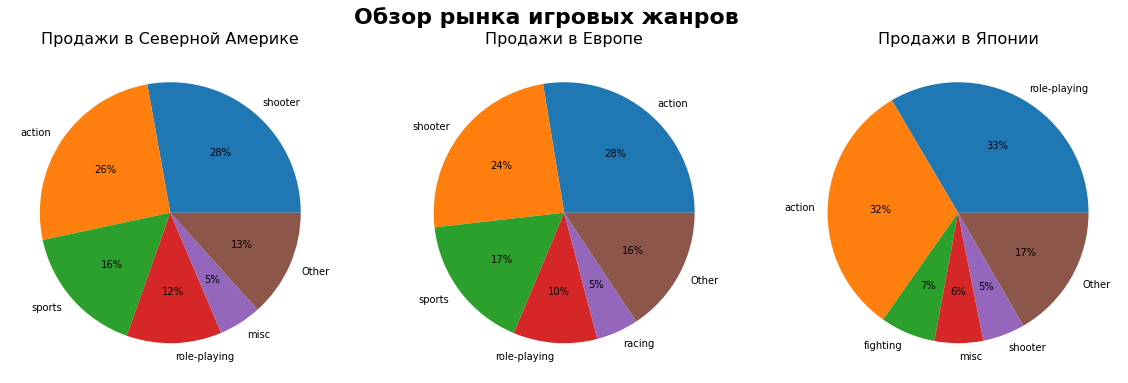

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

fig.suptitle('Обзор рынка игровых жанров', fontsize=22, fontweight='bold')
ax1.pie(na_genres['na_sales'], labels=na_genres['genre'], autopct='%.0f%%')
ax1.set_title('Продажи в Северной Америке',fontsize=16)
ax2.pie(eu_genres['eu_sales'], labels=eu_genres['genre'], autopct='%.0f%%')
ax2.set_title('Продажи в Европе', fontsize=16)
ax3.pie(jp_genres['jp_sales'], labels=jp_genres['genre'], autopct='%.0f%%')
ax3.set_title('Продажи в Японии', fontsize=16);

<b> Вывод

1. Америка и Европа показывают одинаковыу картину по предподчтениию жанров игр даже в цифрах. Единственное в Европе больше любят гонки замыкают топ-5.
2. В Японии опять своя картина... Первое место ролевые игры, далее Action c тоже высоким рейтингом (приблизительно такой же как в Америки и Европе). Стрелялки японцы не любят всего 6,6%. Зато любят симуляторы 7,4%, в Европе и Америки его нет в топ-5.

Рейтинг ESRB: \
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет \
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. \
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» \
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. \
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. \
«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. \
«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [49]:
#суммарные продажи для регионов NA, EU, JP по рейтингу ESRB
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    local_data = actual_data_games.pivot_table(index='rating', aggfunc={i:'sum'}).sort_values(by=i, ascending=False).reset_index()
    local_data['share'] = round(local_data[i] / local_data[i].sum(), 3) * 100
    display(local_data)

,rating,na_sales,share
0,m,96.42,33.9
1,RP,64.72,22.8
2,e,50.74,17.9
3,t,38.95,13.7
4,e10+,33.23,11.7


,rating,eu_sales,share
0,m,93.44,34.5
1,RP,58.95,21.8
2,e,58.06,21.4
3,t,34.07,12.6
4,e10+,26.16,9.7


,rating,jp_sales,share
0,RP,56.90,61.1
1,t,14.78,15.9
2,e,8.94,9.6
3,m,8.01,8.6
4,e10+,4.46,4.8


<b> Вывод

1. Америка и Европа снова полностью вместе. Первое место - игры для взрослых 17+ с рейтингом М, игры с насилем, видом крови итд. На 2 и 3 местах схожие рейтинги E и RP, ограничений в продажах нет, массовый охвот пользователей. Далее игры для детей и подростков.
2. Япония нет стрелялок поэтому игры с рейтингом М только на 4 месте - 11.9%. На первом мести игры с рейтингом RP(мы заполнили им пропуски), т.е. игры без рейтинга - играют все. Тинэйджеры играют больше чем в Европе и Америке - 14.4% против 10-12%. Дети от 10 лет играют более чем в два раза реже чем в Америке и Европе 4,4%.
3. В целом считаю, что рейтинг ESRB  не влияет на продажи в отдельно взятом регионе. Просто В Японии своя специфическая культура.

### Проверка гипотез

####  ГИПОТЕЗА 1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0 - нулевая гипотеза:

Средние пользовательские рейтинги платформ Xbox One и PC равны. 

H1 - альтернативная гипотеза: 

Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы о равенстве средних сохраним два датасета из общего актуального - один платформы Xbox One, другой PC.

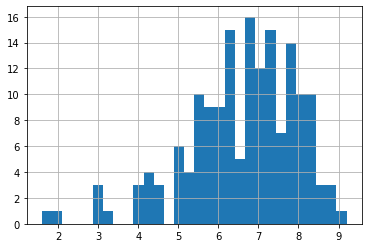

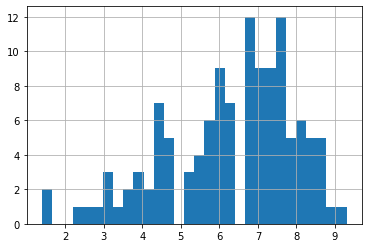

Выборки Xbox One  и PC имеют дисперсии 1.8795460055096425 и 2.8773743617307175 соответственно
Выборки  Xbox One и PC имеют размеры 165 и 122 соответственно


In [50]:
x_one = actual_data_games.query('(user_score > 0) and (platform == "xone")')['user_score']
pc = actual_data_games.query('(user_score > 0) and (platform == "pc")')['user_score']

x_one.hist(bins=30)
plt.show()
pc.hist(bins=30)
plt.show()

# дисперсия выборок
var1 = np.var(x_one)
var2 = np.var(pc)

# размер выборок
len1 = len(x_one)
len2 = len(pc)

print(f'Выборки Xbox One  и PC имеют дисперсии {var1} и {var2} соответственно')
print(f'Выборки  Xbox One и PC имеют размеры {len1} и {len2} соответственно')

Распределение выборок похоже на нормальное. \
Считаем р-значение, сравниваем с критическим уровнем значимости, возьмем 5%.

In [51]:
alpha = 0.05
results = st.ttest_ind(x_one, pc, equal_var = False)
print('p-значение: ', results.pvalue)

# проверка гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


 Данные не противоречат нулевой гипотезе.\
Посмотрим относительную разницу в рейтингах:

In [53]:
print('Средний пользовательский рейтинг на платформе Xbox One: {:.2f}'.format(x_one.mean()))
print('Средний пользовательский рейтинг на платформе PC: {:.2f}'.format(pc.mean()))
print('Наибольший из двух средних отличается от наименьшего на {:.2%}'\
      .format(abs(x_one.mean() - pc.mean()) / max(x_one.mean(), pc.mean())))

Средний пользовательский рейтинг на платформе Xbox One: 6.59
Средний пользовательский рейтинг на платформе PC: 6.30
Наибольший из двух средних отличается от наименьшего на 4.49%


Разница небольшая.

#### ГИПОТЕЗА 2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - нулевая гипотеза:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

H1 - альтернативная гипотеза:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы о равенстве средних сохраним два датасета из общего актуального - один жанра Action, другой жанра Sports

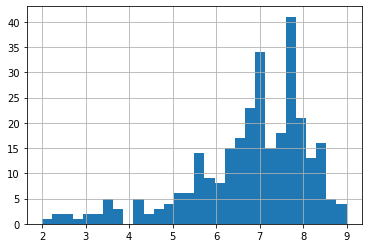

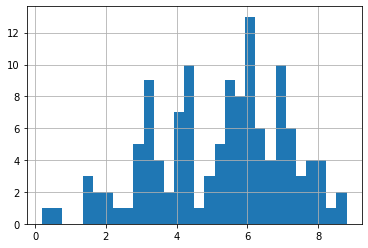

Выборки  Action и Sports имеют дисперсии 1.89208448117539 и 3.4198375596751185 соответственно
Выборки Action и Sports имеют размеры 297 и 127 соответственно


In [54]:
action = actual_data_games.query('(user_score > 0) and (genre == "action")')['user_score']
sports = actual_data_games.query('(user_score > 0) and (genre == "sports")')['user_score']

action.hist(bins=30)
plt.show()
sports.hist(bins=30)
plt.show()

# дисперсия выборок
var1 = np.var(action)
var2 = np.var(sports)

# размер выборок
len1 = len(action)
len2 = len(sports)

print(f'Выборки  Action и Sports имеют дисперсии {var1} и {var2} соответственно')
print(f'Выборки Action и Sports имеют размеры {len1} и {len2} соответственно')

Распределение выборок похоже на нормальное. \
Считаем р-значение, сравниваем с критическим уровнем значимости, возьмем 5%.

In [55]:
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение: ', results.pvalue)

# проверка гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно мы принимаем альтернативную гипотезу. Данные показывают маловероятные результаты равенства пользовательских рейтингов жанров в рамках статистической значимости. \
Посмотрим относительную разницу в рейтингах:

In [56]:
print('Средний пользовательский рейтинг жанра Action: {:.2f}'.format(action.mean()))
print('Средний пользовательский рейтинг жанра Sports: {:.2f}'.format(sports.mean()))
print('Наибольший из двух средних отличается от наименьшего на {:.2%}'.format(abs(action.mean() - sports.mean()) / max(action.mean(), sports.mean())))

Средний пользовательский рейтинг жанра Action: 6.76
Средний пользовательский рейтинг жанра Sports: 5.23
Наибольший из двух средних отличается от наименьшего на 22.71%


Разница существенная.

### Обший вывод

<b> Выделим главные закономерности, выявленные в исследовании:

1.Рынок выпускаемых компьютерных игр стабилизировался с 2012г. За актуальный период возьмем период с 2014г 
т.к. рынок компьютерных игр очень динамичен. \
2.Средний срок жизни платформ порядка 10 лет, с пиком выпуска игр примерно посередине. РС это конечно не касается - он ВСЕГДА стабилен. 

3.Наиболее успешны платформы  PS4, 3DS, Xone и игры выпущенные на них. Так же сюда можно отнести PC.

4.Пользователи по всем платформам при выборе игр ориентируются на рейтинги критиков и продажи практически не зависят от оценок пользователей. 

5.Портрет пользователя в Европе и Северной Америке похож, только американцы больше предпочитают свою отечественную платформу Xbox на 17% больше. Предпочтения по жанрам так же схожи - лидеры Аction, Shooter, Sports, Role-Playing. Но европейцы больше любят гонки, входят в топ-5. \
Японцы живут по своему, предпочтения только своим платформам Nintendo и Sony со своими платформами делят рынок практически 50/50. Жанровые предпочтения тоже свои на первом месте Role-Playing более 40%, так же любят Action 35%, Misc 9%. А вот стрелялки и спортивные игры, в отличии от Америки и Европы непопулярны. \
По возрастному цензу Америка и Европа снова вместе более 60% игры для взрослых. Порядка 20% процентов игры для детей и подростков. В Японии доля игр для взрослых примерно такая же, но подростки играют больше, а дети от 10 меньше, чем в Америке и Европе. В общем рейтинг ESRB мало влияет на продажи в отдельно взятом регионе, может быть японцы немного более дисциплинированы относительно рейтинга. 

6.Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась. Так же как и гипотеза о том что средние пользовательские рейтинги жанров Action и Sports разные. 


<b> Итогом прогноза на 2017 год для магазина обозначу: 

1.Делать акцент на продаже "молодых платформ"  - PS4, XOne и 3DS и игр к ним.
Игры к ПК всегда будут иметь своего покупателя. \
2.Реализовывать  игры самых популярных жанров это: экшен, шутеры, спортивные и ролевые игры, так же можно и гонки. \
3.Должны быть представлнеы игры всех возврастных сегментов, ориентированные как на взрослых так и на подростков и детей.